# Part 1: k Nearest Neighbors

We will first do all the necessary imports to run the code

In [1]:
from scipy import stats #
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy.spatial import distance_matrix

## Exercise 1: Understanding the kNN classifier and implementing the Minkowski distance
The class below contains the basic functionality of a **kNN classifier**. Go through the code and read the comments in it to understand the different operations. 

In [2]:
class KNN:
    '''
    k nearest neighboors algorithm class
    __init__() initialize the model
    train() trains the model
    predict() predict the class for a new point
    '''

    def __init__(self, k):
        '''
        INPUT :
        - k : is a natural number bigger than 0 
        '''

        if k <= 0:
            raise Exception("Sorry, no numbers below or equal to zero. Start again!")
            
        # empty initialization of X and y
        self.X = []
        self.y = []
        # k is the parameter of the algorithm representing the number of neighborhoods
        self.k = k
        
    def train(self,X,y):
        '''
        INPUT :
        - X : is a 2D Nx2 numpy array containing the coordinates of points
        - y : is a 1D Nx1 numpy array containing the labels for the corrisponding row of X
        '''        
        
        self.X=X.copy() # copy your training points
        self.y=y.copy()
       
    def predict(self,X_new,p):
        '''
        INPUT :
        - X_new : is a Mx2 numpy array containing the coordinates of new points whose label has to be predicted
        
        OUTPUT :
        - y_hat : is a Mx1 numpy array containing the predicted labels for the X_new points
        ''' 
            
        dst = self.minkowski_dist(X_new, p) #Estimates the Minkowski distance, order p, of a set of X_new points to the data in the training set.
        ordered = np.argsort(dst, axis=1) # Orders all distances in ascending order
        neighbors = y[ordered[:,0:self.k]] #For every point in the test set, picks the k closest points in the training set
        y_hat, _ = stats.mode(neighbors, axis=1) #As seen in the lecture, we use the mode to assign labels to the new data

        return y_hat
    
    def minkowski_dist(self,X_new,p):
        '''
        INPUT : 
        - X_new : is a Mx2 numpy array containing the coordinates of points for which the distance to the training set X will be estimated
        - p : parameter of the Minkowski distance
        
        OUTPUT :
        - dst : is an MxN numpy array containing the distance of each point in X_new to X
        '''
        ######### Task 1.2 YOUR CODE HERE - do not delete this line ################
        dst=[]
        for i in X_new:
            row=[]
            for j in self.X:
                row.append(pow(pow(i[0]-j[0],p)+pow(i[1]-j[1],p),1/p))
            dst.append(row)
        dst=np.array(dst)
        ######## Task 1.2 END OF YOUR CODE HERE - do not delete this line ##########
        return dst

#### Task 1.1. The function `np.argsort`
Investigate the role of the function `np.argsort`. What is it doing in the code? 

**Hint:** Use the help function in the cell below to display the documentation

In [3]:
lst=np.array([2,6,3,4,1,9,7,8,5,0])
idx=np.argsort(lst,axis=0)
print(lst) #indices
print(lst[idx]) #sorted list

[2 6 3 4 1 9 7 8 5 0]
[0 1 2 3 4 5 6 7 8 9]


#### Task 1.2. Implement the Minkowski distance
You will notice that the implementation of the Minkowski distance is missing. Your first task is to code it. As a reminder, the Minkowski distance, between two $D$-dimensional points $\mathbf{x}$ and $\mathbf{z}$ is defined as: 

\begin{equation}
		\text{dist}(\textbf{x},\textbf{z}) = \left( \sum_{j=1}^D |x_j -z_j|^p\right)^{1/p}
	\end{equation}
    
Write your code where is indicated in the cell corresponding to the kNN class.   

**Tips:** Read carefully the documentation of the function, as the output should be compliant with what is written there. You may want to test your implementation, outside the kNN classifier, using simple examples.  

## Exercise 2: Testing the code
In this exercise you will run the kNN classifier in some data, to gain understanding of its behavior. 

In [4]:
import utils

We will rely on the utils.py file, which was imported in the cell above, to generate our training data using the function `gaussians(N)`. This function generates two multivariate Gaussian distributions, each containing N number of points. 

#### Question 2.1 Understanding the `gaussians` function
Inspect the code of the function `gaussians(N)` within the utils.py file. 
1. What are the means and covariances of each distribution? 
2. What is the dimension $D$ of $\mathbf{X}$? 
3. Which values can $y$ take? 

Your answers here: 
1. The means of the 2 distributions are 2x1 dimensional and respectively [0,0] and [1,1]. The covariances are 2x2 dimensional diagonal matrices, where the first has 0.5 as diagnonal values and the second has 1.
2. The dimension D of X is N, the function parameter
3. y can take values from 0 to len(means)=2(?)

In [5]:
X, y = utils.gaussians(100) #We create 100 points from each distribution. Input data (observations) are stored in X and the labels in y.

As testing set, we will create a grid of points covering the range of $\mathbf{X}$. Study the code snippet below and try to understand what is being done.

In [6]:
# Create a grid of testing points
h=.02 # space in the grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx is the x-axis coordinate of the points in the test set
# yy is the y-axis coordinate of the points in the test set
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# X_test contains the test set inputs (xx,yy)
X_test = np.c_[xx.ravel(), yy.ravel()]

#### Question 2.2 `np.meshgrid`
What is the function `np.meshgrid` doing? Use the help function (`help(name_of_function)`) to answer the question.

In [7]:
#Your answer here
#help(np.meshgrid)
# the function creates an N dimentional rectagular grid from one-dimentional coordinate arrays, xx and yy.

#### Task 2.1 Running kNNs
Now it is time to test the kNN classifier. We will use k=3 to start with. We will use the function `plot_results(args)` in the utils file to visualize the obtained results. Please inspect the code of the function and try to understand it.

/var/folders/83/0bs_nssj38dc10fftj5s06hh0000gn/T/ipykernel_60908/1568488138.py:46: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_hat, _ = stats.mode(neighbors, axis=1) #As seen in the lecture, we use the mode to assign labels to the new data


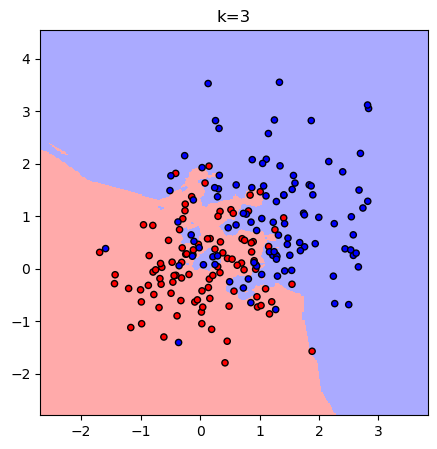

In [8]:
# Parameter K defining the KNN algorithm
k=3
# Create a model for the KNN with inputs the ones from the gaussians and test the model using the grid of testing points
knn_model_k3 = KNN(k)
knn_model_k3.train(X, y)
y_test_k3=knn_model_k3.predict(X_test,2)
# Put the result into a color plot
y_test_k3 = y_test_k3.reshape(xx.shape)
utils.plot_results(xx,yy, X, y, y_test_k3, "k=" + str(k))

#### Question 2.3 Analysing the results
What do you think of the obtained results? Are they good? Are there any misclassified points? What do the colors in the background denote? 

Your answer here:

#### Task 2.2 Assessing different values of k
Create different kNN classifiers using different values of $k$. Namely, $k=[1,5,10,50,100]$

**Bonus:** If you feel brave, you can try to create a figure with all the subplots (one per k), rather than having them in separate cells. 

/var/folders/83/0bs_nssj38dc10fftj5s06hh0000gn/T/ipykernel_60908/1568488138.py:46: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_hat, _ = stats.mode(neighbors, axis=1) #As seen in the lecture, we use the mode to assign labels to the new data


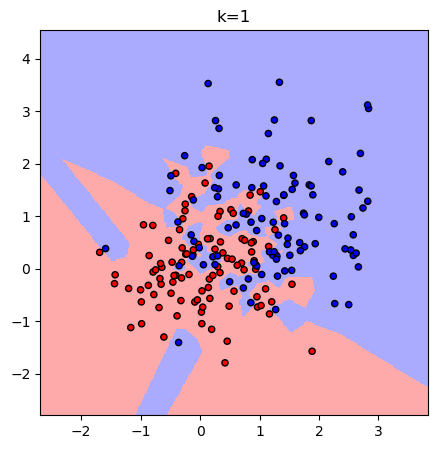

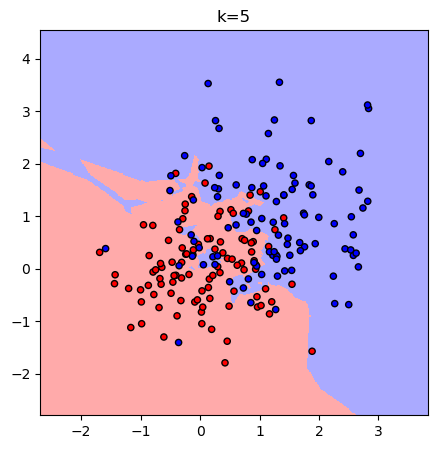

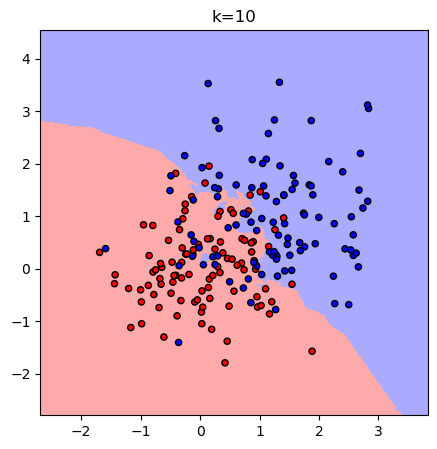

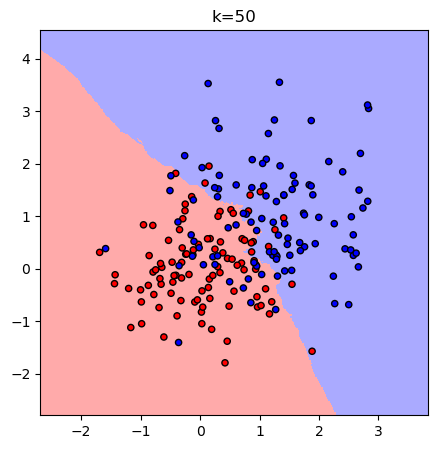

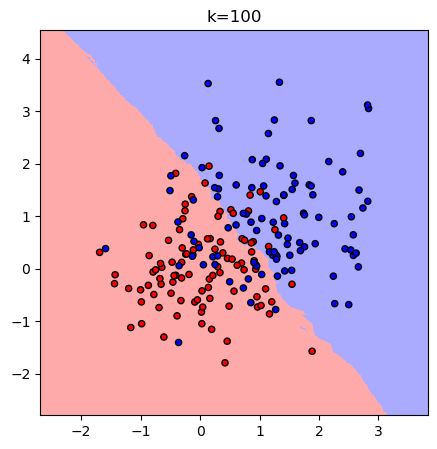

In [9]:
Ks = [1, 5, 10, 50, 100]

######### Task 2.2 YOUR CODE HERE - do not delete this line ################
for i in range(len(Ks)):
    knn_model=(KNN(Ks[i]))
    knn_model.train(X,y)
    y_test=knn_model.predict(X_test,2)
    y_test=y_test.reshape(xx.shape)
    utils.plot_results(xx,yy, X, y, y_test, "k=" + str(Ks[i]))
    knn_model=0
    y_test=0

 ######### Task 2.2 YOUR CODE ENDS HERE - do not delete this line ################

#### Question 2.4 Differences between k's
What differences do you observe as you vary k? What occurs when $k=1$? When $k=N$? Which value would you choose?

Your answer here:

The seperation line between the two classes becomes increasingly linear as k increases. We would choose k=5 or k=10, because this seems to give us more correct classifications. 

#### Question 2.5 Good practices in machine learning
According to what we saw during our first lecture, the procedure we are following to identify the good value of $k$ may be wrong. Do you agree? Justify your answer.

Your answer here:

We do not have a quantifiable measure that can tell us what value of k is a good value. We can only decide which k is better only by visual plots.

### Final remark: kNNs implementation
In the two previous exercises, we have used a "home made" implementation of the kNNs algorithm. This implementation serves for academic purposes, but may not prove robust applications.

If you are interested in further working with the kNNs algorithm, you may want to discover its implementation in the scikit-learn library:

* [Nearest Neighbors in Scikit-learn](https://scikit-learn.org/stable/modules/neighbors.html)

## Exercise 3: The curse of dimensionality
In this final exercise, we will investigate the weaknesses of the kNN algorithm.

Suppose we have a D dimension hypercube with all sides of length 1 in the Cartesian map, i.e. $[0,1]^D$. 

We sample the training data **uniformly** from this hypercube, i.e. $\forall \, i, \mathbf{x}_i \in [0,1]^D$.

Assume we will use $k=10$ to define the label of a test point.

#### Question 3.1 Estimating the space taken by the k-nearest neighbors 
Let $l$ be the edge length of the smallest hypercube that contains all k-nearest neighbor of a test point. What is the approximate volume of the hyercube? What is the length of $l$? Express your answers in terms of $k$, $D$ (the dimensions) and $N$ the number of training points.

Your answer here: 

The volume of the hypercube is $$l^D$$. The length of l is $$l=\sqrt[D]{\frac{k}{N}}$$

#### Task 3.1 Exploring the behavior of $l$
Using the expression you found for $l$ in the previous question, estimate the size of $l$ as a fuction of $D$. Assume a training set size $N=1000$. Store the values in a numpy array named l_values.

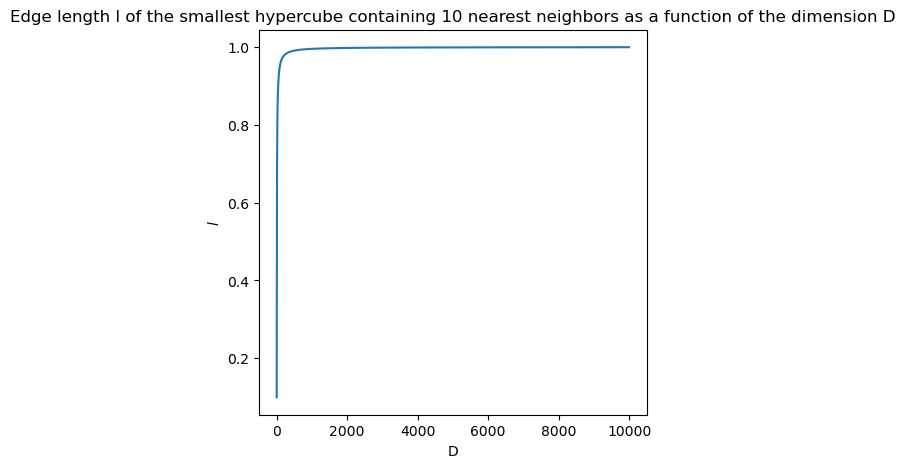

In [10]:
D=np.arange(2,10000,10)

######### Task 3.1 YOUR CODE HERE - do not delete this line ################
N=1000
k=10
l_values=[]
for i in range(len(D)):
    l_values.append((k/N)**(1/D[i]))

######### Task 3.1 YOUR CODE ENDS HERE - do not delete this line ################

sns.lineplot(x = D, y = l_values)
plt.title('Edge length l of the smallest hypercube containing 10 nearest neighbors as a function of the dimension D')
plt.xlabel('D')
plt.ylabel('$l$')
plt.show()

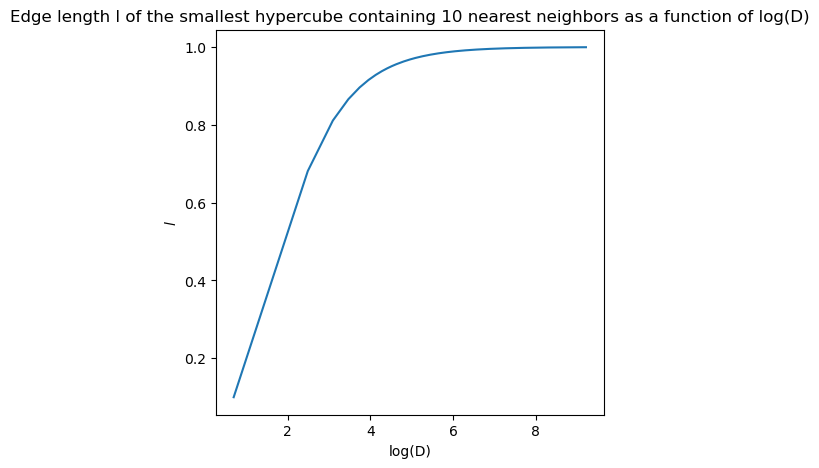

In [11]:
#Let us visualize the same results using a log scale
sns.lineplot(x = np.log(D), y = l_values)
plt.title('Edge length l of the smallest hypercube containing 10 nearest neighbors as a function of log(D)')
plt.xlabel('log(D)')
plt.ylabel('$l$')
plt.show()

#### Question 3.2 Analysis
What can you say about the obtained results? What happens with $l$ as $D \gg 0$? What consequences this may have for the k nearest neighbor algorithm? 

Your answer here: 

For large D, the set of N points are nearly equidistant from one another. This means that the kNN algorithm will not be able to find the nearest neighbour, as all points are the nearest neighbours.

#### Task 3.2 Finding a good training set size (N)
Let us suppose that your training set $\mathcal{D} \in \mathbb{R}^{20}$. You really want to use the k-nearest neighbor classifier. However, from the previous results, it seems that with a dataset of $N=1000$ the search space is too large. Plot different values of $N$ to identify when will $l \leq 0.2$. You may assume $k=10$. Plot an horizontal bar at $l=0.2$ to assist your analysis. 

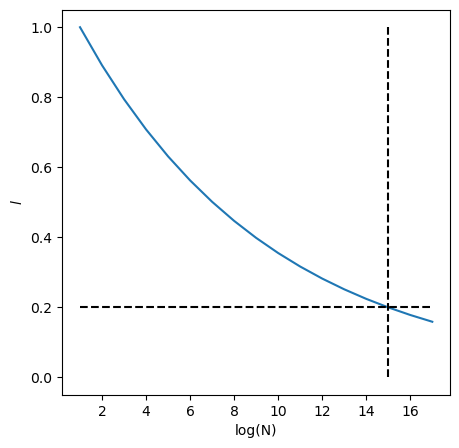

In [12]:
######### Task 3.2 YOUR CODE HERE - do not delete this line ################

D=20
k=10

N=np.linspace(1,17,17)
l=(k/(10**N))**(1/D)

sns.lineplot(x = N, y = l)
plt.plot([1,17],[0.2,0.2],"k--")
plt.plot([15,15],[0,1],"k--")
plt.xlabel('log(N)')
plt.ylabel('$l$')
plt.show()

######### Task 3.2 YOUR CODE ENDS HERE - do not delete this line ################


#### Question 3.3 Analysis
What do these results suggest? Does it seem feasible to find a dataset that fits your needs?

Your answer: 

No, because the dataset have to contain 10^15 samples. This is illustrated by the two black dashed lines in the plot.

#### Question 3.4 The Curse of Dimensionality
The phenomenon that you are observing is well-known. It is known as the curse of dimensionality. Investigate about it and explain it using **your own words**. Copy-pasted text will represent a mark zero to the question.

Your answer here: 

Since we have a large dimension, 20, the number of samples in the dataset needs to be at least 10^15, for the cube to pick the 10 nearest neighbours with l=0.2. 